#TASK
3. YOU HVAE TO IMPLEMENT SVR(ADDIMISSOIN_PREDICTION)

https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVR

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')


In [3]:
df 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
for cols in df.columns:
    print(cols,">>>" ,df[cols].nunique())
    

Serial No. >>> 500
GRE Score >>> 49
TOEFL Score >>> 29
University Rating >>> 5
SOP >>> 9
LOR  >>> 9
CGPA >>> 184
Research >>> 2
Chance of Admit  >>> 61


In [43]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Text(0, 0.5, 'GRE SCORE')

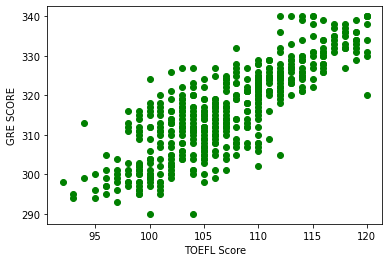

In [52]:
plt.scatter(x=df['TOEFL Score'],y=df['GRE Score'],c='g')
plt.xlabel('TOEFL Score')
plt.ylabel('GRE SCORE')

Text(0, 0.5, 'GRE SCORE')

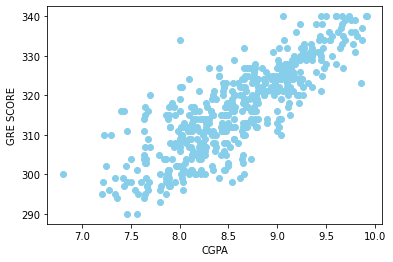

In [61]:
plt.scatter(x=df['CGPA'],y=df['GRE Score'],c='skyblue')
plt.xlabel('CGPA')
plt.ylabel('GRE SCORE')

Text(0, 0.5, 'GRE SCORE')

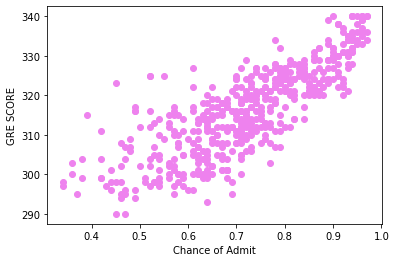

In [66]:
plt.scatter(x=df['Chance of Admit '],y=df['GRE Score'],c='violet')
plt.xlabel('Chance of Admit')
plt.ylabel('GRE SCORE')

In [10]:
df.shape

(500, 9)

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:>

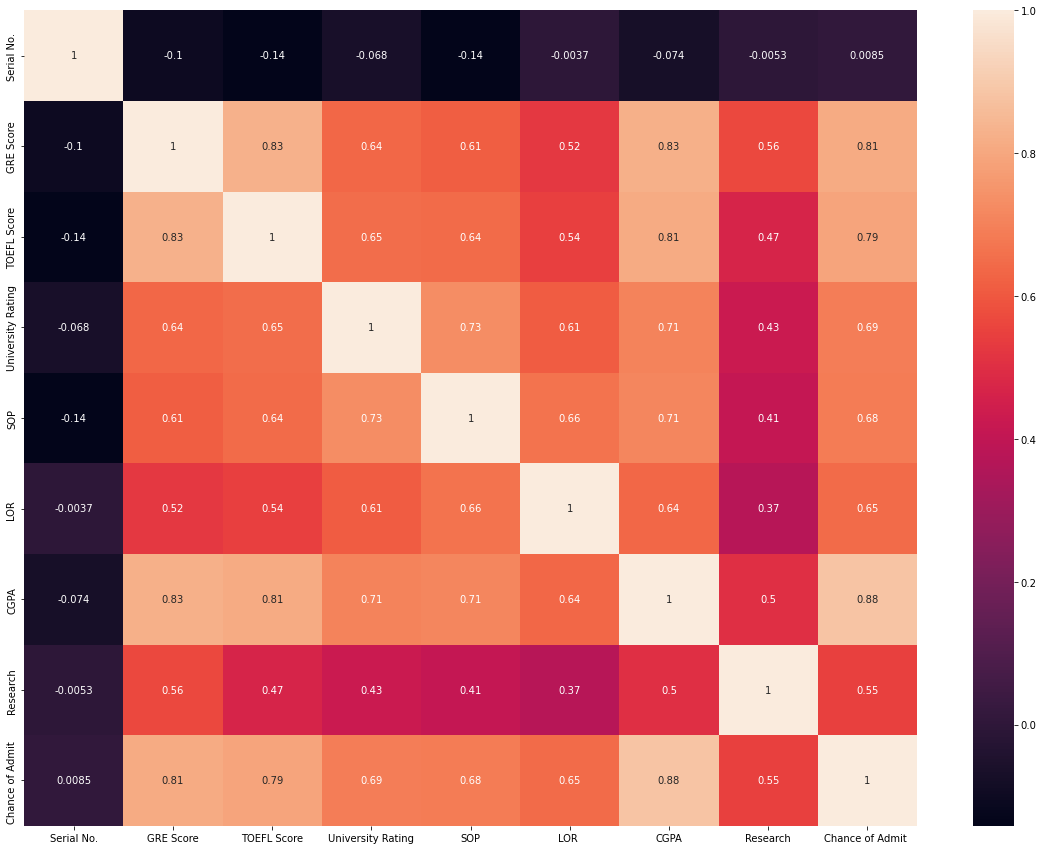

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [24]:
y=df['Chance of Admit ']
x=df.iloc[:,:-1]

In [25]:
X_train,X_test,y_train,y_test =train_test_split(x,y,random_state=2022,test_size=0.2)

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [31]:
model_pipe=make_pipeline(StandardScaler(),SVR())
model_pipe_min= make_pipeline(MinMaxScaler(),SVR())

In [34]:
model_pipe_min.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

In [36]:
y_pred_min=model_pipe_min.predict(X_test)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [40]:
r2_score(y_test,y_pred_min)

0.7510232724528672

In [41]:
mean_squared_error(y_test,y_pred_min)

0.005688309050087457

In [42]:
mean_absolute_error(y_test,y_pred_min)

0.059739737045346644